In [13]:
import pandas as pd
from pytrends.request import TrendReq
import matplotlib
import pandas as pd
pytrends = TrendReq(hl='en-US', tz=360)
#pytrends = TrendReq(hl='en-US', tz=360, timeout=(10,25), proxies=['https://34.203.233.13:80',], retries=2, backoff_factor=0.1, requests_args={'verify':False})
from pandas.tseries.offsets import DateOffset
import os
akcja = 'AAPL'


def downloadTrends(keyword):
    kw_list = [keyword]
    pytrends.build_payload(kw_list, cat=0, timeframe='all', geo='', gprop='')
    data = pytrends.interest_over_time()
    data= data.drop(labels=['isPartial'],axis='columns')
    return data
def dataSet(stock):
    pass_name = stock +' stock'
    df = downloadTrends(pass_name)
    df.reset_index(inplace=True)

    fik = os.listdir('NASDAQ')
    kif = os.listdir('NYSE')
    if stock+'.US.csv' in kif:
        df_5 = pd.read_csv('NYSE/'+ stock+'.US.csv')
    elif stock+'.US.csv' in fik:
        df_5 = pd.read_csv('NASDAQ/'+ stock+'.US.csv')
    else:
        print("CANCEl")
        return 0
    #df = pd.read_csv('Trends001')
    
    #df['date'] = pd.to_datetime(df['date'], format = "%Y-%m-%d")
    # Create target dates: all days in the weeks in the original dataframe
    new_index = pd.date_range(start=df['date'].iloc[0],
                              end=df['date'].iloc[-1] + DateOffset(6),
                              freq='D')

    # Temporarily set dates as index, conform to target dates and forward fill data
    # Finally reset the index as in the original df  
    out = df.set_index('date')\
            .reindex(new_index).ffill()\
            .reset_index(drop=False)\
            .rename(columns = {'index' : 'date'})
    dates_t = out['date'].to_list()
    dates_y = []
    for y in dates_t:
        dates_y.append(y.strftime("%Y-%m-%d"))
    for x in range(len(df_5)):
        if df_5['Date'][x] in dates_y:
            g = dates_y.index(df_5['Date'][x])
            df_5['Adjusted_close'][x] = out[pass_name][g]
    
        else:
            df_5 = df_5.drop(x)
    print('k')
    df_5.to_csv('trendsup/'+stock+'TRENDS.csv')
df_6 = pd.read_csv('russell3000.csv')
spolki = df_6['Ticker'].to_list()
spolki = spolki[70:]
print(len(spolki))
#spolki = spolki[:250]    
print(len(spolki))
for x in spolki:
    print('START: ',x)
    print(x[-2:])
    if x[-2:] != '.B':
        dataSet(x)
    print('DONE: ',x)
    #time.sleep(10)

2868
2868
START:  AF
AF
CANCEl
DONE:  AF
START:  AFAM
AM
CANCEl
DONE:  AFAM
START:  AFG
FG


<ipython-input-13-c26e568c0c99>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['Adjusted_close'][x] = out[pass_name][g]


k
DONE:  AFG
START:  AFH
FH
CANCEl
DONE:  AFH
START:  AFI
FI
k
DONE:  AFI
START:  AFL
FL
k
DONE:  AFL
START:  AFSI
SI
CANCEl
DONE:  AFSI
START:  AGCO
CO
k
DONE:  AGCO
START:  AGEN
EN
k
DONE:  AGEN
START:  AGFS
FS
k
DONE:  AGFS
START:  AGII
II
CANCEl
DONE:  AGII
START:  AGIO
IO
k
DONE:  AGIO
START:  AGM
GM
k
DONE:  AGM
START:  AGN
GN
CANCEl
DONE:  AGN
START:  AGNC
NC
k
DONE:  AGNC
START:  AGO
GO
k
DONE:  AGO
START:  AGR
GR
k
DONE:  AGR
START:  AGX
GX
k
DONE:  AGX
START:  AGYS
YS
k
DONE:  AGYS
START:  AHH
HH
k
DONE:  AHH
START:  AHL
HL
CANCEl
DONE:  AHL
START:  AHP
HP
CANCEl
DONE:  AHP
START:  AHT
HT
k
DONE:  AHT
START:  AI
AI
k
DONE:  AI
START:  AIG
IG
k
DONE:  AIG
START:  AIMC
MC
k
DONE:  AIMC
START:  AIMT
MT
CANCEl
DONE:  AIMT
START:  AIN
IN
k
DONE:  AIN
START:  AIR
IR
k
DONE:  AIR
START:  AIT
IT
k
DONE:  AIT
START:  AIV
IV
k
DONE:  AIV
START:  AIZ
IZ
k
DONE:  AIZ
START:  AJG
JG
k
DONE:  AJG
START:  AJRD
RD
k
DONE:  AJRD
START:  AJX
JX
k
DONE:  AJX
START:  AKAM
AM
k
DONE:  AKAM
START:

KeyError: "['isPartial'] not found in axis"

In [12]:
import pandas as pd
df_6 = pd.read_csv('Russel-Copy1.csv')
spolki = df_6['Symbol'].to_list()
print(spolki.index('ETRN'))
spolki.reverse()
print(len(spolki[950:]))

969
70


In [20]:
import os
os.remove('NYSE/JW.A.US.csv')

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'NYSE/JW.A.US.csv'

In [17]:
import os
import pandas as pd
score=0
files = os.listdir('trendsup')
print(len(files))
for x in files:
    df = pd.read_csv('trendsup/'+x)
    if len(df)< 4300:
        os.remove('trendsup/'+x)
print(score)

840
0


In [4]:
import pandas as pd
df = pd.read_csv('nasdaq-100.csv')
df.head()

,Symbol,Name,Last,Change,%Chg,High,Low,Volume,Time
0,AAPL,Apple Inc,132.99,2.63,+2.02%,133.04,129.47,106686703.0,04/09/21
1,ADBE,Adobe Systems Inc,504.04,4.20,+0.84%,504.44,492.60,1887000.0,04/09/21
2,ADI,Analog Devices,161.24,-0.88,-0.54%,161.97,160.17,2250400.0,04/09/21
3,ADP,Automatic Data Procs,189.44,1.24,+0.66%,189.83,187.00,1128400.0,04/09/21
4,ADSK,Autodesk Inc,297.57,4.14,+1.41%,297.90,290.38,1032700.0,04/09/21


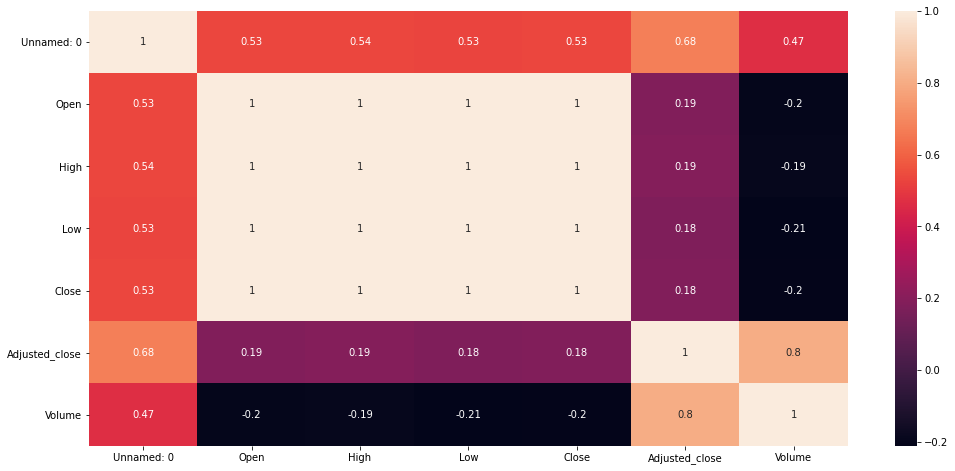

In [35]:
df = pd.read_csv('Obykurwa')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1 , figsize = (17 , 8))
cor = sns.heatmap(df.corr(), annot = True)

In [ ]:
import pandas as pd
import os
gg = []
def makeSet(file):
    ticker = pd.read_csv('TrendsV3_L/'+file)
    print(len(ticker))
    for x in range(len(ticker)):
        if x != len(ticker)-32:
            first_m= ticker['Close'][x]
            second_m = ticker['Close'][x+5]
            change = (first_m/second_m)*100
            if change > 100:
                change_m = change-100
            else:
                change_m = change-100
            ticker['change'][x]= change_m
            ticker.to_csv('TrendsV3_L/'+file)
        else:
            break
#df_6 = pd.read_csv('nasdaq-100.csv')
#spolki = df_6['Symbol'].to_list()
spolki = os.listdir('TrendsV3_L')
spolki.pop(0)
spolki.reverse()
for f in range(0,16):
    spolki.pop(0)
print(spolki)

for x in spolki:
    print('START: ',x)
    makeSet(x)
    print('DONE: ',x)

['NVDATRENDS.csv', 'NTESTRENDS.csv', 'NFLXTRENDS.csv', 'MXIMTRENDS.csv', 'MUTRENDS.csv', 'MSFTTRENDS.csv', 'MRVLTRENDS.csv', 'MDLZTRENDS.csv', 'MCHPTRENDS.csv', 'LRCXTRENDS.csv', 'KLACTRENDS.csv', 'ISRGTRENDS.csv', 'INTUTRENDS.csv', 'INTCTRENDS.csv', 'INCYTRENDS.csv', 'ILMNTRENDS.csv', 'IDXXTRENDS.csv', 'GILDTRENDS.csv', 'FISVTRENDS.csv', 'FASTTRENDS.csv', 'EXCTRENDS.csv', 'EBAYTRENDS.csv', 'EATRENDS.csv', 'DLTRTRENDS.csv', 'CTSHTRENDS.csv', 'CTASTRENDS.csv', 'CSXTRENDS.csv', 'CSCOTRENDS.csv', 'CPRTTRENDS.csv', 'COSTTRENDS.csv', 'CMCSATRENDS.csv', 'CHKPTRENDS.csv', 'CERNTRENDS.csv', 'CDNSTRENDS.csv', 'BKNGTRENDS.csv', 'ATVITRENDS.csv', 'ASMLTRENDS.csv', 'ANSSTRENDS.csv', 'AMZNTRENDS.csv', 'AMGNTRENDS.csv', 'AMDTRENDS.csv', 'AMATTRENDS.csv', 'ALXNTRENDS.csv', 'ALGNTRENDS.csv', 'AEPTRENDS.csv', 'ADSKTRENDS.csv', 'ADPTRENDS.csv', 'ADITRENDS.csv', 'ADBETRENDS.csv', 'AAPLTRENDS.csv']
START:  NVDATRENDS.csv
4338


<ipython-input-2-9522464bd7cc>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ticker['change'][x]= change_m


DONE:  NVDATRENDS.csv
START:  NTESTRENDS.csv
4338
DONE:  NTESTRENDS.csv
START:  NFLXTRENDS.csv
4338
DONE:  NFLXTRENDS.csv
START:  MXIMTRENDS.csv
4338
DONE:  MXIMTRENDS.csv
START:  MUTRENDS.csv
4338
DONE:  MUTRENDS.csv
START:  MSFTTRENDS.csv
4338
DONE:  MSFTTRENDS.csv
START:  MRVLTRENDS.csv
4338
DONE:  MRVLTRENDS.csv
START:  MDLZTRENDS.csv
4338
DONE:  MDLZTRENDS.csv
START:  MCHPTRENDS.csv
4338
DONE:  MCHPTRENDS.csv
START:  LRCXTRENDS.csv
4338
DONE:  LRCXTRENDS.csv
START:  KLACTRENDS.csv
4338
DONE:  KLACTRENDS.csv
START:  ISRGTRENDS.csv
4338


,date,AAPL stock
0,2016-04-10,11.0
1,2016-04-11,11.0
2,2016-04-12,11.0
3,2016-04-13,11.0
4,2016-04-14,11.0


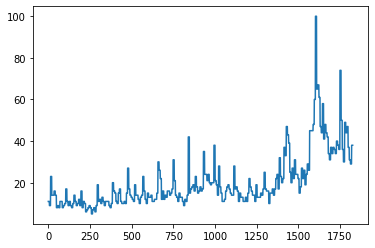

In [29]:
df = pd.read_csv('Trends001')
# Make sure dates is treated as datetime 
df['date'] = pd.to_datetime(df['date'], format = "%Y-%m-%d")

from pandas.tseries.offsets import DateOffset

# Create target dates: all days in the weeks in the original dataframe
new_index = pd.date_range(start=df['date'].iloc[0],
                          end=df['date'].iloc[-1] + DateOffset(6),
                          freq='D')

# Temporarily set dates as index, conform to target dates and forward fill data
# Finally reset the index as in the original df  
out = df.set_index('date')\
        .reindex(new_index).ffill()\
        .reset_index(drop=False)\
        .rename(columns = {'index' : 'date'})
out.to_csv('Trends24')
out['AAPL stock'].plot()
out.head()

<AxesSubplot:>

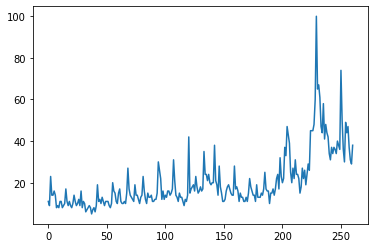

In [9]:
trends = pd.read_csv('Trends001')
trends['AAPL stock'].plot()